In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### Read the data 

In [2]:
cookies = pd.read_csv('cookies.csv')

In [3]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


### Exploratory Data Analysis and Descriptive Statistics

In [4]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

## Bake time 

In [5]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

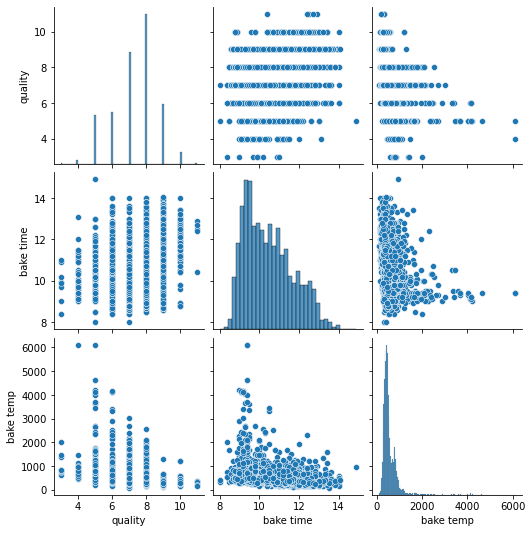

In [6]:
sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

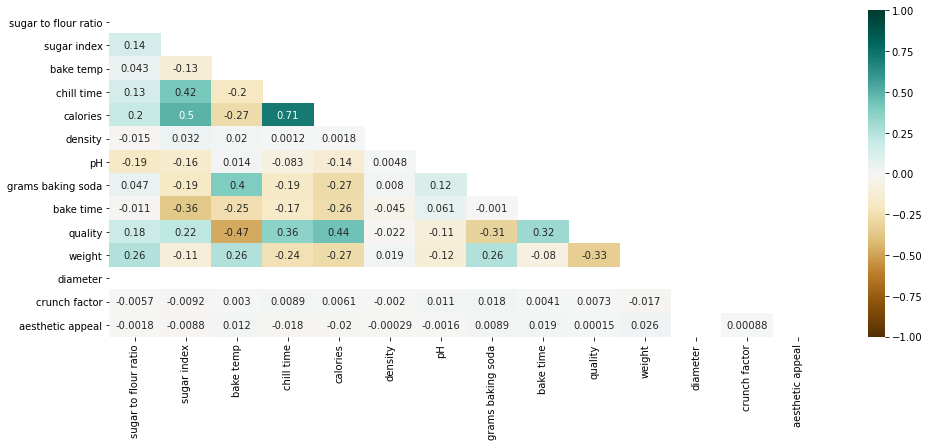

In [7]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

**VALIDATE** - shows that a high corelation between chilltime and calories

In [8]:
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.18213460597745224
sugar index --> 0.22065352244335387
bake temp --> -0.47050370901242416
chill time --> 0.36465303504313296
calories --> 0.4398363987447588
density --> -0.021995308762374943
pH --> -0.11472101703648831
grams baking soda --> -0.30534038308979605
bake time --> 0.3153070710526115
quality --> 1.0
weight --> -0.3282994017266423
diameter --> nan
crunch factor --> 0.007262050440050089
aesthetic appeal --> 0.00015142266125493597


## butter

In [9]:
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

## aesthetic appeal

In [10]:
cookies['aesthetic appeal'].value_counts()

3    5195
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

## weight

In [11]:
cookies['weight'].describe()

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [12]:
cookies['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

In [13]:
cookies.drop(cookies.loc[cookies['weight']== -99].index, inplace=True)

In [14]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [15]:
cookies['weight'].unique()

array([15.2, 12.4,  9.4, 12.2, 19.8, 13.2, 14.2, 13.8, 12.6, 12.8, 13. ,
       14. , 12. , 14.6, 15.6, 13.4, 16.8, 14.8, 13.6, 16. , 11. , 18.6,
       10.6, 18.2, 15.8, 17.2, 14.3, 10.4, 11.8, 11.6, 15.4, 21.6, 20.2,
       14.4, 12.3, 23.8, 11.2, 11.4, 15. , 19.6, 17.4, 16.4, 19.2, 10.8,
       18. , 26. , 16.6, 16.2, 19. , 10. , 21.4, 20.4, 17. , 31.2, 17.8,
       22.6,  9.8, 23. , 18.8, 26.6, 20.8, 26.4, 10.2, 22.2, 23.4, 18.4,
       17.6, 28.4, 24.6, 20.6, 25. , 24.2, 22.8, 24. , 23.2, 24.4, 26.8,
       22.4, 19.4, 23.6, 27.4, 28. , 22. , 21.8, 25.2, 25.8, 20. , 21.2,
       21. , 25.6, 31. ,  9. , 24.8, 25.4,  9.6,  8.8, 30. , 12.9,  9.2,
       31.8,  7.6,  7.8,  8.4, 28.6])

Thoughts on weight : 

  -[X] -   Remove -99 value 

## diameter

In [16]:
cookies['diameter'].unique()

array([7], dtype=int64)

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

## bake time

In [17]:
cookies['bake time'].describe()

count    5187.000000
mean       10.494757
std         1.194699
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [18]:
cookies['bake time'].isna().sum()

10

In [19]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

In [20]:
mean_bt = cookies['bake time'].mean()
cookies['bake time'] = cookies['bake time'].fillna(mean_bt)

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

## crunch factor

<AxesSubplot:ylabel='Frequency'>

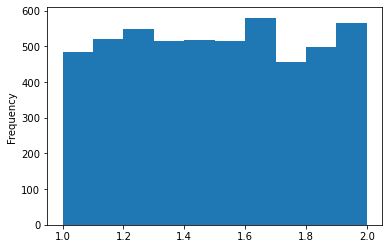

In [21]:
cookies['crunch factor'].plot.hist()

## mixins

In [22]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5197 non-null   float64
 1   sugar index           5192 non-null   float64
 2   bake temp             5197 non-null   int64  
 3   chill time            5197 non-null   float64
 4   calories              5197 non-null   float64
 5   density               5197 non-null   float64
 6   pH                    5197 non-null   float64
 7   grams baking soda     5197 non-null   float64
 8   bake time             5197 non-null   float64
 9   quality               5197 non-null   int64  
 10  butter type           5197 non-null   object 
 11  weight                5197 non-null   float64
 12  diameter              5197 non-null   int64  
 13  mixins                5195 non-null   object 
 14  crunch factor         5197 non-null   float64
 15  aesthetic appeal     

In [23]:
cookies['mixins']

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5197, dtype: object

In [24]:
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [25]:
cookies['mixins'].nunique()

13

### Wrangling the data / making small changes 

In [26]:
cookies.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [27]:
cookies=cookies.dropna(subset=['mixins'])

In [28]:
cookies.reset_index(drop=True, inplace=True)

In [29]:
cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

In [30]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [31]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

In [32]:
cookies.drop(columns=["mixins"], inplace=True)

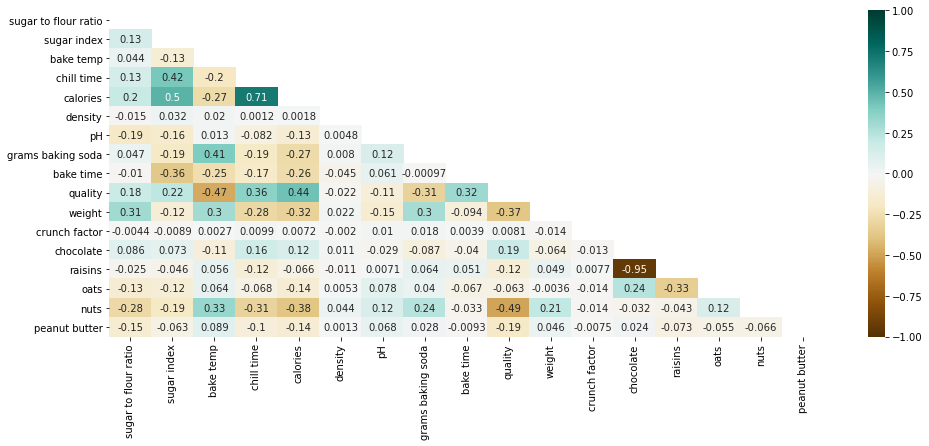

In [33]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### pre processing- drop NANs and deal with non numerical data


In [34]:
cookies.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
crunch factor           float64
chocolate                 int64
raisins                   int64
oats                      int64
nuts                      int64
peanut butter             int64
dtype: object

In [35]:
cookies=pd.get_dummies(cookies, columns=['butter type'])


In [36]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5195 non-null   float64
 1   sugar index           5190 non-null   float64
 2   bake temp             5195 non-null   int64  
 3   chill time            5195 non-null   float64
 4   calories              5195 non-null   float64
 5   density               5195 non-null   float64
 6   pH                    5195 non-null   float64
 7   grams baking soda     5195 non-null   float64
 8   bake time             5195 non-null   float64
 9   quality               5195 non-null   int64  
 10  weight                5195 non-null   float64
 11  crunch factor         5195 non-null   float64
 12  chocolate             5195 non-null   int64  
 13  raisins               5195 non-null   int64  
 14  oats                  5195 non-null   int64  
 15  nuts                 

In [37]:
cookies = cookies.dropna()

In [38]:
cookies.reset_index(drop=True, inplace=True)

### Split data into dependent and independent variables 

In [39]:
X= cookies.drop(columns="quality")
y=cookies.quality

training the data to predict Quality

### Preprocessing - scaling 

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.1, random_state=40)


### get model, fit, make predictions  AND evaluate

In [42]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [44]:
predictions  = lm.predict(X_test)

In [45]:
predictions

array([ 8.49272006,  7.85081597,  7.94254407,  8.42447361,  7.9493106 ,
        8.11275394,  7.86901626,  8.39173502,  7.4493763 ,  8.28509673,
        7.29665323,  5.79258127,  5.29573256,  8.2609706 ,  7.03038743,
        6.89575785,  5.18136631,  8.52379225,  8.291419  ,  5.78265532,
        8.27660725,  4.85420608,  6.76223623,  7.62528573,  6.00567213,
        5.24055136,  8.24936181,  7.90376652,  7.31539594,  8.45697971,
        6.13575173,  7.94612269,  8.35042962,  8.54734845,  7.21450837,
        7.3171959 ,  7.70068278,  7.57651047,  7.93947329,  8.28515749,
        8.0370997 ,  8.47300435,  8.20860653,  8.30456511,  8.30843398,
        8.10305477,  5.50546029,  8.06817277,  4.97828347,  8.52400187,
        5.46145331,  8.34655512,  7.68966446,  7.53880915,  7.66772584,
        7.16720066,  7.68054393,  7.19538059,  7.95885739,  7.54532219,
        8.06244304,  7.83580533,  7.26794655,  7.907988  ,  8.45394036,
        7.24013702,  7.61357453,  7.67228127,  7.63032845,  8.08

In [46]:
r2_score(y_test, predictions)

0.6711551350186775

In [47]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.5532889537784804


In [48]:
import math 
rmse = math.sqrt(mse)
print(rmse)

0.7438339557848112


### Make predictions on the cookies_validate dataset (without labels)

In [49]:
cookies_val = pd.read_csv('cookies_validate.csv')

In [50]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  butter type           779 non-null    object 
 12  weight                779 non-null    float64
 13  diameter              779 non-null    int64  
 14  mixins                779 non-null    object 
 15  crunch factor         7

In [51]:
cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [52]:
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [53]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
cookies_val.drop(columns=["mixins"], inplace=True)

In [54]:
cookies_val.drop(columns= 'id', inplace=True)

In [55]:
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [56]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  779 non-null    float64
 1   sugar index           779 non-null    float64
 2   bake temp             779 non-null    float64
 3   chill time            779 non-null    float64
 4   calories              779 non-null    float64
 5   density               779 non-null    float64
 6   pH                    779 non-null    float64
 7   grams baking soda     779 non-null    float64
 8   bake time             779 non-null    float64
 9   quality               779 non-null    int64  
 10  weight                779 non-null    float64
 11  crunch factor         779 non-null    float64
 12  chocolate             779 non-null    int64  
 13  raisins               779 non-null    int64  
 14  oats                  779 non-null    int64  
 15  nuts                  7

In [57]:
X_val = cookies_val.drop(columns="quality")

In [58]:
X_val_scaled = scaler.fit_transform(X_val)

In [59]:
predictions_val=lm.predict(X_val_scaled)

In [60]:
predictions_val

array([7.42041111, 7.36775942, 7.51162814, 7.79511581, 7.17997949,
       7.16333071, 7.54035208, 7.13342696, 7.64446869, 7.36792925,
       7.50825856, 7.35505191, 7.44725435, 7.65480068, 7.91159519,
       7.16029338, 7.56040354, 7.11321784, 8.2609789 , 8.02441045,
       7.6333274 , 7.58951266, 8.06016734, 7.67171695, 6.91014392,
       6.90722418, 6.96078917, 7.41664646, 6.93032279, 7.30170668,
       7.60894181, 7.92723806, 7.4046095 , 7.48170388, 7.79727343,
       7.96872538, 7.81639199, 7.75341322, 7.12614544, 7.53258136,
       7.97023126, 7.74308725, 7.46026372, 7.05447002, 7.47605356,
       7.32176063, 7.21183151, 7.85660044, 7.59444782, 7.21278509,
       7.092565  , 7.02402616, 7.29243728, 7.20448182, 7.06292073,
       8.01396985, 7.21622081, 7.40465679, 7.90341085, 8.0122938 ,
       7.02604594, 7.4217926 , 6.67471658, 7.58729653, 7.49953943,
       7.39040521, 7.49129219, 7.25669458, 7.02819063, 8.21018302,
       7.99073125, 8.17389901, 7.12635677, 6.84887252, 7.74277

### assess predictions against the test data (with labels)

In [61]:
cookies_test = pd.read_csv('cookies_test.csv')

In [62]:
y_real = cookies_test["quality"]

In [63]:
y_real.describe()

count    779.000000
mean       7.661104
std        1.093643
min        4.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000
Name: quality, dtype: float64

In [64]:
mean_squared_error(y_real, predictions_val, squared = False)

0.9004053433151435

### Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score

In [65]:
#import the librbry
from sklearn.ensemble import RandomForestRegressor

In [66]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=3)
model= regressor.fit(X_train,y_train)  


In [67]:
predictions  = model.predict(X_test)
print('the prediction for the Randomn Forest Regression is:',predictions)

the prediction for the Randomn Forest Regression is: [8.39039098 7.63590422 8.20780793 8.44430321 8.20780793 8.20780793
 7.42456159 8.44430321 7.42456159 8.24374716 7.57623959 5.6329201
 5.09325301 8.44430321 7.57623959 7.63590422 5.09325301 8.44430321
 8.44430321 6.21224237 8.24374716 5.184549   7.36489697 7.63590422
 5.95722889 5.5484697  7.99422527 7.63590422 7.63590422 8.44430321
 5.53849662 7.63590422 8.44430321 8.44430321 7.57623959 7.57623959
 7.63590422 7.63590422 8.24374716 8.24374716 8.20780793 7.67131886
 8.39039098 8.44430321 8.39039098 8.20780793 5.61669079 8.24374716
 5.53849662 8.44430321 5.53849662 8.20200756 7.63590422 7.82546092
 7.63590422 7.42456159 7.63590422 7.63590422 7.63590422 7.82546092
 7.82546092 7.63590422 7.42456159 7.63590422 8.44430321 7.63590422
 7.42456159 7.63590422 7.82546092 8.20780793 7.63590422 8.39039098
 7.82546092 8.44430321 5.184549   7.82113639 8.20780793 7.36489697
 7.63590422 7.88602017 5.53849662 8.16528949 8.20780793 8.44430321
 7.4245615

In [68]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [69]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

In [70]:
plt.figure(figsize=(140,140))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)

### Evaluate random forest accuracy 

In [71]:
r2_score(y_test, predictions)

0.683362613051196

In [72]:
mse = mean_squared_error(y_test, predictions)
print(mse)
import math 
rmse = math.sqrt(mse)
print(rmse)

0.5327495947428159
0.7298969754306535


### Make predictions on the cookies_validate dataset (without labels)

In [73]:
cookies_val

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,chocolate,raisins,oats,nuts,peanut butter,butter type_cubed,butter type_melted
0,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,0,16.6,1.85,1,0,0,1,0,0,1
1,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,0,13.8,1.43,1,0,0,0,0,0,1
2,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,0,17.0,1.57,1,0,0,0,0,0,1
3,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,0,12.4,1.44,1,0,1,0,0,0,1
4,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,0,14.8,1.51,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,0,13.8,1.01,1,0,1,1,0,1,0
775,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,0,14.8,1.68,0,0,1,1,0,1,0
776,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,0,12.4,1.38,0,0,1,1,0,1,0
777,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,0,13.4,1.63,0,0,0,0,1,1,0


In [76]:
predictions_val=model.predict(X_val_scaled)
print('the prediction for the Randomn Forest Regression is:',predictions_val)

the prediction for the Randomn Forest Regression is: [7.57623959 7.63590422 7.63590422 8.02732512 7.63590422 7.42456159
 7.63590422 7.57623959 8.20780793 7.82546092 7.63590422 7.42456159
 7.42456159 7.63590422 8.24374716 7.63590422 7.82546092 7.42456159
 8.39039098 8.24374716 7.82546092 7.82546092 8.24374716 7.63590422
 7.57623959 7.57623959 7.42456159 7.63590422 7.57623959 7.63590422
 7.88602017 7.63590422 7.42456159 7.64935562 8.24374716 7.82546092
 8.24374716 8.20780793 7.42456159 7.82546092 7.96244135 7.63590422
 7.82546092 7.42456159 7.42456159 7.42456159 7.63590422 8.20780793
 7.63590422 7.82546092 7.42456159 7.57623959 7.63590422 7.82546092
 7.42456159 8.24374716 7.63590422 7.42456159 8.44430321 8.44430321
 7.63590422 7.63590422 7.36489697 8.16528949 8.20780793 7.63590422
 7.63590422 7.63590422 7.63590422 8.39039098 7.96244135 8.44430321
 7.63590422 7.42456159 7.82546092 7.47076281 7.88602017 7.63590422
 7.42456159 7.82113639 7.63590422 8.24374716 7.42456159 7.63590422
 7.635904

### assess predictions against the test data (with labels)

In [77]:
mean_squared_error(y_real, predictions_val, squared = False)

0.7722072095100967

**VALIDATION** the msr reduced from .90 to .77